In [1]:
# Initial imports
import os
from bs4 import BeautifulSoup
import requests
import pandas as pd
import hvplot.pandas
from pathlib import Path
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools_fp import MCSimulation
import numpy as np
import datetime
import holoviews as hv
import panel as pn
from datetime import date
import logging
import csv
import json


%matplotlib inline


####
import os
import requests
from dotenv import load_dotenv
import pandas as pd
import datetime as dt
from MCForecastTools import MCSimulation

####
import os
from dotenv import load_dotenv
import requests
import pandas as pd
import datetime as dt
import hvplot.pandas
import holoviews as hv
import panel as pn


In [2]:
bpip_delta=datetime.timedelta(weeks=1)
bpip_pair_delta=datetime.timedelta(weeks=4)
bpip_delta10=datetime.timedelta(weeks=12)
bpip_delta30=datetime.timedelta(weeks=205)

# ISO 8601 week as number with Monday as the first day of the week then change date from string to int
bpip_date = date.today()
bpip_date_cast = bpip_date + bpip_delta10
bpip_date_hist = bpip_date - bpip_delta30
bpip_day_fdiff = (bpip_date_cast - bpip_date) / 7
bpip_day_hdiff = (bpip_date - bpip_date_hist) / 7
bpip_fdiff = bpip_day_fdiff.days
bpip_hdiff = bpip_day_hdiff.days


In [3]:
#Loop through url calendars for forcast data
count=0
df_ffxevents_list = []
while(count < bpip_fdiff):
    bpip_dfdelta=datetime.timedelta(weeks=count)
    bpip_date_dfcast = bpip_date + bpip_dfdelta
    print(f"Forecast Date: {bpip_date_dfcast}")
    bpip_wk_dfcaststr = bpip_date_dfcast.strftime("%V")
    print(f"Forecast Week String: {bpip_wk_dfcaststr}")
    bpip_yr_dfcaststr = bpip_date_dfcast.strftime("%Y")
    print(f"Current Year String: {bpip_yr_dfcaststr}")
    bpip_yr_dfcastiso = bpip_date_dfcast.isocalendar()[0]
    print(f"Current Year: {bpip_yr_dfcastiso}")
    # get webpage and make the soup
    babe_url = f"https://www.babypips.com/economic-calendar?timezone=America%2FChicago&week={bpip_yr_dfcastiso}-W{bpip_wk_dfcaststr}"
    print(babe_url)
    baseURL = requests.get(babe_url)
    fxcal_soup = BeautifulSoup(baseURL.content, 'html.parser')

    #Get all tag decendents 
    fxcal = fxcal_soup.find(class_="Table-module__table___2Nidf")
    fxcal_tbl_days = fxcal.find_all(class_="Section-module__container___2mwAW")

    #Loop through html classes and div tag elements
    #df_ffxevents_list = []
    for x in fxcal_tbl_days[0:]:
        pd_news_day = [a.get_text() for a in x.select(".Section-module__container___2mwAW .Table-module__name___1XC4z")]
        pd_month_day = [b.get_text() for b in x.select(".Section-module__container___2mwAW .Table-module__month___2Efxb") * len(pd_news_day)]
        pd_date_day = [c.get_text() for c in x.select(".Section-module__container___2mwAW .Table-module__dayNumber___1DiwN") * len(pd_news_day)]
        pd_wkday_day = [d.get_text() for d in x.select(".Section-module__container___2mwAW .Table-module__weekday___1xUx_") * len(pd_news_day)]
        pd_time_day = [e.get_text() for e in x.select(".Section-module__container___2mwAW .Table-module__time___iPjt3")]
        pd_curr_day = [f.get_text() for f in x.select(".Section-module__container___2mwAW .Currency-module__code___1A32e")]
        pd_impact_day = [g.get_text() for g in x.select(".Section-module__container___2mwAW .Impact-module__pill___2pcuA")]
        pd_forecast_day = [h.get_text() for h in x.select(".Table-module__eventRow___2Z1BD .Table-module__forecast___3F_kh")]
        pd_previous_day = [i.get_text() for i in x.select(".Table-module__eventRow___2Z1BD .Table-module__previous___1PJZ9")]

    #Build list elements into list of dataframes, concatenate dataframes and export to csv 
        df_ffxevents_day = pd.DataFrame.from_dict({
        "pd_year": bpip_yr_dfcastiso,
        "pd_month": pd_month_day,
        "pd_date": pd_date_day,
        "pd_weekday": pd_wkday_day,
        "pd_time": pd_time_day,
        "pd_currency": pd_curr_day,
        "pd_news": pd_news_day,
        "pd_impact": pd_impact_day,
        "pd_forecast": pd_forecast_day,
        "pd_previous": pd_previous_day})
        df_ffxevents_list.append(df_ffxevents_day)
    count = count + 1
df_ffxevents_cat = pd.concat(df_ffxevents_list)
df_ffxevents_cat.to_csv('fxevents_forecast.csv')
count=0
df_ffxevents_cat.head(20)


Forecast Date: 2021-01-07
Forecast Week String: 01
Current Year String: 2021
Current Year: 2021
https://www.babypips.com/economic-calendar?timezone=America%2FChicago&week=2021-W01
Forecast Date: 2021-01-14
Forecast Week String: 02
Current Year String: 2021
Current Year: 2021
https://www.babypips.com/economic-calendar?timezone=America%2FChicago&week=2021-W02
Forecast Date: 2021-01-21
Forecast Week String: 03
Current Year String: 2021
Current Year: 2021
https://www.babypips.com/economic-calendar?timezone=America%2FChicago&week=2021-W03
Forecast Date: 2021-01-28
Forecast Week String: 04
Current Year String: 2021
Current Year: 2021
https://www.babypips.com/economic-calendar?timezone=America%2FChicago&week=2021-W04
Forecast Date: 2021-02-04
Forecast Week String: 05
Current Year String: 2021
Current Year: 2021
https://www.babypips.com/economic-calendar?timezone=America%2FChicago&week=2021-W05
Forecast Date: 2021-02-11
Forecast Week String: 06
Current Year String: 2021
Current Year: 2021
http

pd_year pd_month pd_date pd_weekday pd_time pd_currency  \
0      2021      Jan       3     Sunday   16:00         AUD   
1      2021      Jan       3     Sunday   18:30         JPY   
2      2021      Jan       3     Sunday   19:45         CNY   
0      2021      Jan       4     Monday   01:00         GBP   
1      2021      Jan       4     Monday   01:00         GBP   
2      2021      Jan       4     Monday   02:30         CHF   
3      2021      Jan       4     Monday   02:50         EUR   
4      2021      Jan       4     Monday   02:55         EUR   
5      2021      Jan       4     Monday   03:00         EUR   
6      2021      Jan       4     Monday   03:30         GBP   
7      2021      Jan       4     Monday   03:30         GBP   
8      2021      Jan       4     Monday   03:30         GBP   
9      2021      Jan       4     Monday   03:30         GBP   
10     2021      Jan       4     Monday   03:30         GBP   
11     2021      Jan       4     Monday   04:00         EUR   
12     2021      Jan       4     Monday   08:00         EUR   
13     2021      Jan       4     Monday   08:00         EUR   
14     2021      Jan       4     Monday   08:00         EUR   
15     2021      Jan       4     Monday   08:30         CAD   
16     2021      Jan       4     Monday   08:45         USD   

                                  pd_news pd_impact pd_forecast pd_previous  
0                 AIG Manufacturing Index       med        56.0        55.8  
1      Jibun Bank Manufacturing PMI Final       med        49.7        49.0  
2        Chinese Caixin Manufacturing PMI      high        54.6        54.9  
0           Nationwide Housing Prices YoY       med                          
1           Nationwide Housing Prices MoM       med                          
2            procure.ch Manufacturing PMI       low        54.5        55.2  
3   French Markit Manufacturing PMI Final       low        51.1        49.6  
4   German Markit Manufacturing PMI Final       med        58.6        57.8  
5          Markit Manufacturing PMI Final       med        55.5        53.8  
6     Markit/CIPS Manufacturing PMI Final       med        57.3        55.6  
7          Net Lending to Individuals MoM       low        3.6B       3.8B*  
8                     BoE Consumer Credit       med       -1.4B      -0.7B*  
9                      Mortgage Approvals       med       80.1k      98.3k*  
10                       Mortgage Lending       med        4.0B       4.5B*  
11       French New Car Registrations YoY       low      -12.8%      -27.0%  
12            French 12-Month BTF Auction       low                 -0.69%*  
13             French 6-Month BTF Auction       low                 -0.72%*  
14             French 3-Month BTF Auction       low                 -0.74%*  
15               Markit Manufacturing PMI       med        56.0        55.8  
16                      Manufacturing PMI       med        56.5        56.7

In [4]:
file_path = Path("fxevents_forecast.csv")
forecast_data = pd.read_csv(file_path)
forecast_data.head(20)

Unnamed: 0  pd_year pd_month  pd_date pd_weekday pd_time pd_currency  \
0            0     2021      Jan        3     Sunday   16:00         AUD   
1            1     2021      Jan        3     Sunday   18:30         JPY   
2            2     2021      Jan        3     Sunday   19:45         CNY   
3            0     2021      Jan        4     Monday   01:00         GBP   
4            1     2021      Jan        4     Monday   01:00         GBP   
5            2     2021      Jan        4     Monday   02:30         CHF   
6            3     2021      Jan        4     Monday   02:50         EUR   
7            4     2021      Jan        4     Monday   02:55         EUR   
8            5     2021      Jan        4     Monday   03:00         EUR   
9            6     2021      Jan        4     Monday   03:30         GBP   
10           7     2021      Jan        4     Monday   03:30         GBP   
11           8     2021      Jan        4     Monday   03:30         GBP   
12           9     2021      Jan        4     Monday   03:30         GBP   
13          10     2021      Jan        4     Monday   03:30         GBP   
14          11     2021      Jan        4     Monday   04:00         EUR   
15          12     2021      Jan        4     Monday   08:00         EUR   
16          13     2021      Jan        4     Monday   08:00         EUR   
17          14     2021      Jan        4     Monday   08:00         EUR   
18          15     2021      Jan        4     Monday   08:30         CAD   
19          16     2021      Jan        4     Monday   08:45         USD   

                                  pd_news pd_impact pd_forecast pd_previous  
0                 AIG Manufacturing Index       med        56.0        55.8  
1      Jibun Bank Manufacturing PMI Final       med        49.7        49.0  
2        Chinese Caixin Manufacturing PMI      high        54.6        54.9  
3           Nationwide Housing Prices YoY       med         NaN         NaN  
4           Nationwide Housing Prices MoM       med         NaN         NaN  
5            procure.ch Manufacturing PMI       low        54.5        55.2  
6   French Markit Manufacturing PMI Final       low        51.1        49.6  
7   German Markit Manufacturing PMI Final       med        58.6        57.8  
8          Markit Manufacturing PMI Final       med        55.5        53.8  
9     Markit/CIPS Manufacturing PMI Final       med        57.3        55.6  
10         Net Lending to Individuals MoM       low        3.6B       3.8B*  
11                    BoE Consumer Credit       med       -1.4B      -0.7B*  
12                     Mortgage Approvals       med       80.1k      98.3k*  
13                       Mortgage Lending       med        4.0B       4.5B*  
14       French New Car Registrations YoY       low      -12.8%      -27.0%  
15            French 12-Month BTF Auction       low         NaN     -0.69%*  
16             French 6-Month BTF Auction       low         NaN     -0.72%*  
17             French 3-Month BTF Auction       low         NaN     -0.74%*  
18               Markit Manufacturing PMI       med        56.0        55.8  
19                      Manufacturing PMI       med        56.5        56.7

In [5]:
forecast_data['Date'] = pd.to_datetime(forecast_data[['pd_month', 'pd_date', 'pd_year']].astype(str).agg('-'.join, axis=1))
forecast_data.set_index(forecast_data['Date'], inplace=True)
forecast_data = forecast_data.drop(columns=["pd_month", "pd_date", "pd_year", "pd_weekday", "Date"])
forecast_data = forecast_data.loc[:, ~forecast_data.columns.str.contains('^Unnamed')]
forecast_data.head(20)

pd_time pd_currency                                pd_news  \
Date                                                                    
2021-01-03   16:00         AUD                AIG Manufacturing Index   
2021-01-03   18:30         JPY     Jibun Bank Manufacturing PMI Final   
2021-01-03   19:45         CNY       Chinese Caixin Manufacturing PMI   
2021-01-04   01:00         GBP          Nationwide Housing Prices YoY   
2021-01-04   01:00         GBP          Nationwide Housing Prices MoM   
2021-01-04   02:30         CHF           procure.ch Manufacturing PMI   
2021-01-04   02:50         EUR  French Markit Manufacturing PMI Final   
2021-01-04   02:55         EUR  German Markit Manufacturing PMI Final   
2021-01-04   03:00         EUR         Markit Manufacturing PMI Final   
2021-01-04   03:30         GBP    Markit/CIPS Manufacturing PMI Final   
2021-01-04   03:30         GBP         Net Lending to Individuals MoM   
2021-01-04   03:30         GBP                    BoE Consumer Credit   
2021-01-04   03:30         GBP                     Mortgage Approvals   
2021-01-04   03:30         GBP                       Mortgage Lending   
2021-01-04   04:00         EUR       French New Car Registrations YoY   
2021-01-04   08:00         EUR            French 12-Month BTF Auction   
2021-01-04   08:00         EUR             French 6-Month BTF Auction   
2021-01-04   08:00         EUR             French 3-Month BTF Auction   
2021-01-04   08:30         CAD               Markit Manufacturing PMI   
2021-01-04   08:45         USD                      Manufacturing PMI   

           pd_impact pd_forecast pd_previous  
Date                                          
2021-01-03       med        56.0        55.8  
2021-01-03       med        49.7        49.0  
2021-01-03      high        54.6        54.9  
2021-01-04       med         NaN         NaN  
2021-01-04       med         NaN         NaN  
2021-01-04       low        54.5        55.2  
2021-01-04       low        51.1        49.6  
2021-01-04       med        58.6        57.8  
2021-01-04       med        55.5        53.8  
2021-01-04       med        57.3        55.6  
2021-01-04       low        3.6B       3.8B*  
2021-01-04       med       -1.4B      -0.7B*  
2021-01-04       med       80.1k      98.3k*  
2021-01-04       med        4.0B       4.5B*  
2021-01-04       low      -12.8%      -27.0%  
2021-01-04       low         NaN     -0.69%*  
2021-01-04       low         NaN     -0.72%*  
2021-01-04       low         NaN     -0.74%*  
2021-01-04       med        56.0        55.8  
2021-01-04       med        56.5        56.7

In [6]:
forecast_data = forecast_data[forecast_data['pd_currency'].isin(['USD', 'EUR', 'GBP', 'JPY'])]
forecast_data = forecast_data[forecast_data['pd_impact'].isin(['high'])]
forecast_data.head(20)

pd_time pd_currency                         pd_news pd_impact  \
Date                                                                       
2021-01-05   23:00         JPY             Consumer Confidence      high   
2021-01-06   07:15         USD  ADP National Employment Report      high   
2021-01-07   07:30         USD                Balance of Trade      high   
2021-01-08   01:00         EUR         German Balance of Trade      high   
2021-01-08   04:00         EUR                Business Climate      high   
2021-01-08   07:30         USD                Nonfarm Payrolls      high   
2021-01-08   07:30         USD               Unemployment Rate      high   
2021-01-08   07:30         USD     Average Hourly Earnings MoM      high   
2021-01-13   07:30         USD              Inflation Rate YoY      high   
2021-01-13   07:30         USD         Core Inflation Rate YoY      high   
2021-01-14   03:00         EUR        German Government Budget      high   
2021-01-15   01:00         GBP    Manufacturing Production MoM      high   
2021-01-15   01:00         GBP    Manufacturing Production YoY      high   
2021-01-15   01:00         GBP                Balance of Trade      high   
2021-01-15   07:30         USD                         PPI MoM      high   
2021-01-15   07:30         USD                Retail Sales MoM      high   
2021-01-20   01:00         GBP              Inflation Rate YoY      high   
2021-01-20   17:50         JPY                Balance of Trade      high   
2021-01-21   17:30         JPY              Inflation Rate YoY      high   
2021-01-21   18:01         GBP         Gfk Consumer Confidence      high   

           pd_forecast pd_previous  
Date                                
2021-01-05        35.0        33.7  
2021-01-06      170.0k     304.0k*  
2021-01-07      -67.6B      -63.1B  
2021-01-08       17.6B       19.4B  
2021-01-08         NaN         NaN  
2021-01-08      112.0k      245.0k  
2021-01-08        6.7%        6.7%  
2021-01-08        0.1%        0.3%  
2021-01-13        1.2%        1.2%  
2021-01-13        1.6%        1.6%  
2021-01-14       -7.0%        1.5%  
2021-01-15        0.2%        1.7%  
2021-01-15       -6.0%       -7.1%  
2021-01-15       -1.2B       -1.7B  
2021-01-15        0.2%        0.1%  
2021-01-15        0.2%       -1.1%  
2021-01-20        0.5%        0.3%  
2021-01-20      200.0B      366.8B  
2021-01-21       -0.3%       -0.9%  
2021-01-21       -27.0       -26.0

In [7]:
forecast_data.isnull().mean() * 100

pd_time         0.00
pd_currency     0.00
pd_news         0.00
pd_impact       0.00
pd_forecast    63.75
pd_previous    67.50
dtype: float64

In [8]:
forecast_data["pd_forecast"] = forecast_data["pd_forecast"].fillna(0)
forecast_data["pd_previous"] = forecast_data["pd_previous"].fillna(0)
forecast_data.head(20)

pd_time pd_currency                         pd_news pd_impact  \
Date                                                                       
2021-01-05   23:00         JPY             Consumer Confidence      high   
2021-01-06   07:15         USD  ADP National Employment Report      high   
2021-01-07   07:30         USD                Balance of Trade      high   
2021-01-08   01:00         EUR         German Balance of Trade      high   
2021-01-08   04:00         EUR                Business Climate      high   
2021-01-08   07:30         USD                Nonfarm Payrolls      high   
2021-01-08   07:30         USD               Unemployment Rate      high   
2021-01-08   07:30         USD     Average Hourly Earnings MoM      high   
2021-01-13   07:30         USD              Inflation Rate YoY      high   
2021-01-13   07:30         USD         Core Inflation Rate YoY      high   
2021-01-14   03:00         EUR        German Government Budget      high   
2021-01-15   01:00         GBP    Manufacturing Production MoM      high   
2021-01-15   01:00         GBP    Manufacturing Production YoY      high   
2021-01-15   01:00         GBP                Balance of Trade      high   
2021-01-15   07:30         USD                         PPI MoM      high   
2021-01-15   07:30         USD                Retail Sales MoM      high   
2021-01-20   01:00         GBP              Inflation Rate YoY      high   
2021-01-20   17:50         JPY                Balance of Trade      high   
2021-01-21   17:30         JPY              Inflation Rate YoY      high   
2021-01-21   18:01         GBP         Gfk Consumer Confidence      high   

           pd_forecast pd_previous  
Date                                
2021-01-05        35.0        33.7  
2021-01-06      170.0k     304.0k*  
2021-01-07      -67.6B      -63.1B  
2021-01-08       17.6B       19.4B  
2021-01-08           0           0  
2021-01-08      112.0k      245.0k  
2021-01-08        6.7%        6.7%  
2021-01-08        0.1%        0.3%  
2021-01-13        1.2%        1.2%  
2021-01-13        1.6%        1.6%  
2021-01-14       -7.0%        1.5%  
2021-01-15        0.2%        1.7%  
2021-01-15       -6.0%       -7.1%  
2021-01-15       -1.2B       -1.7B  
2021-01-15        0.2%        0.1%  
2021-01-15        0.2%       -1.1%  
2021-01-20        0.5%        0.3%  
2021-01-20      200.0B      366.8B  
2021-01-21       -0.3%       -0.9%  
2021-01-21       -27.0       -26.0

In [9]:
forecast_data.isnull().mean() * 100

pd_time        0.0
pd_currency    0.0
pd_news        0.0
pd_impact      0.0
pd_forecast    0.0
pd_previous    0.0
dtype: float64

In [10]:
forecast_data = forecast_data.rename(columns={
    "pd_time": "Time",
    "pd_currency": "Currency",
    "pd_news": "News", 
    "pd_impact": "Impact",
    "pd_forecast": "Forecast",
    "pd_previous": "Previous"})
forecast_data.to_csv("../Project-01/fxevents_forecast_GSd.csvfxevents_forecast_GSd.csv")
forecast_data.head(20)

Time Currency                            News Impact Forecast  \
Date                                                                         
2021-01-05  23:00      JPY             Consumer Confidence   high     35.0   
2021-01-06  07:15      USD  ADP National Employment Report   high   170.0k   
2021-01-07  07:30      USD                Balance of Trade   high   -67.6B   
2021-01-08  01:00      EUR         German Balance of Trade   high    17.6B   
2021-01-08  04:00      EUR                Business Climate   high        0   
2021-01-08  07:30      USD                Nonfarm Payrolls   high   112.0k   
2021-01-08  07:30      USD               Unemployment Rate   high     6.7%   
2021-01-08  07:30      USD     Average Hourly Earnings MoM   high     0.1%   
2021-01-13  07:30      USD              Inflation Rate YoY   high     1.2%   
2021-01-13  07:30      USD         Core Inflation Rate YoY   high     1.6%   
2021-01-14  03:00      EUR        German Government Budget   high    -7.0%   
2021-01-15  01:00      GBP    Manufacturing Production MoM   high     0.2%   
2021-01-15  01:00      GBP    Manufacturing Production YoY   high    -6.0%   
2021-01-15  01:00      GBP                Balance of Trade   high    -1.2B   
2021-01-15  07:30      USD                         PPI MoM   high     0.2%   
2021-01-15  07:30      USD                Retail Sales MoM   high     0.2%   
2021-01-20  01:00      GBP              Inflation Rate YoY   high     0.5%   
2021-01-20  17:50      JPY                Balance of Trade   high   200.0B   
2021-01-21  17:30      JPY              Inflation Rate YoY   high    -0.3%   
2021-01-21  18:01      GBP         Gfk Consumer Confidence   high    -27.0   

           Previous  
Date                 
2021-01-05     33.7  
2021-01-06  304.0k*  
2021-01-07   -63.1B  
2021-01-08    19.4B  
2021-01-08        0  
2021-01-08   245.0k  
2021-01-08     6.7%  
2021-01-08     0.3%  
2021-01-13     1.2%  
2021-01-13     1.6%  
2021-01-14     1.5%  
2021-01-15     1.7%  
2021-01-15    -7.1%  
2021-01-15    -1.7B  
2021-01-15     0.1%  
2021-01-15    -1.1%  
2021-01-20     0.3%  
2021-01-20   366.8B  
2021-01-21    -0.9%  
2021-01-21    -26.0

In [11]:
#forecast_path = Path("../fxevents_forecast_master.csv")

forecast_path = Path("../Project-01/fxevents_forecast_master.csv")

forecastmstr_data = pd.read_csv(forecast_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
forecastmstr_data.head(20)

Time Currency                            News Impact Forecast  \
Date                                                                         
2020-12-22   1:00      EUR  German GfK Consumer Confidence   high     -9.2   
2020-12-22   9:00      USD          CB Consumer Confidence   high     95.1   
2020-12-23   7:30      USD                 Personal Income   high   -0.40%   
2020-12-23   7:30      USD           Personal Spending MoM   high   -0.40%   
2020-12-23   7:30      USD            Durable Goods Orders   high    0.60%   
2020-12-23   9:00      USD    UoM Consumer Sentiment Index   high     81.3   
2021-01-05  23:00      JPY             Consumer Confidence   high       35   
2021-01-06   7:15      USD  ADP National Employment Report   high   210.0k   
2021-01-07   7:30      USD                Balance of Trade   high   -66.0B   
2021-01-08   1:00      EUR         German Balance of Trade   high    17.6B   
2021-01-08   4:00      EUR                Business Climate   high        0   
2021-01-08   7:30      USD                Nonfarm Payrolls   high   190.0k   
2021-01-08   7:30      USD               Unemployment Rate   high    6.60%   
2021-01-08   7:30      USD     Average Hourly Earnings MoM   high    0.10%   
2021-01-13   7:30      USD              Inflation Rate YoY   high    1.10%   
2021-01-13   7:30      USD         Core Inflation Rate YoY   high    1.60%   
2021-01-14   3:00      EUR        German Government Budget   high   -7.00%   
2021-01-15   1:00      GBP    Manufacturing Production MoM   high    0.20%   
2021-01-15   1:00      GBP    Manufacturing Production YoY   high   -6.00%   
2021-01-15   1:00      GBP                Balance of Trade   high    -1.2B   

           Previous  Direction  
Date                            
2020-12-22    -6.8*          1  
2020-12-22    92.9*          1  
2020-12-23   -0.6%*          1  
2020-12-23    0.3%*          1  
2020-12-23    1.8%*          1  
2020-12-23     76.9          1  
2021-01-05     33.7          1  
2021-01-06   307.0k          1  
2021-01-07   -63.1B          1  
2021-01-08    19.4B          1  
2021-01-08        0          0  
2021-01-08   245.0k          1  
2021-01-08    6.70%         -1  
2021-01-08    0.30%          1  
2021-01-13    1.20%         -1  
2021-01-13    1.60%         -1  
2021-01-14    1.50%          1  
2021-01-15    1.70%          1  
2021-01-15   -7.10%          1  
2021-01-15    -1.7B          1

In [12]:
forecastmstr_data["Previous"] = forecastmstr_data["Previous"].str.replace("*", "").str.replace("%", "").str.replace("k", "").str.replace("B", "").str.replace(",", "")
forecastmstr_data["Forecast"] = forecastmstr_data["Forecast"].str.replace("*", "").str.replace("%", "").str.replace("k", "").str.replace("B", "").str.replace(",", "")    
forecastmstr_data['Previous'] = forecastmstr_data['Previous'].astype('float')
forecastmstr_data['Forecast'] = forecastmstr_data['Forecast'].astype('float')
forecastmstr_data.head(20)

Time Currency                            News Impact  Forecast  \
Date                                                                          
2020-12-22   1:00      EUR  German GfK Consumer Confidence   high      -9.2   
2020-12-22   9:00      USD          CB Consumer Confidence   high      95.1   
2020-12-23   7:30      USD                 Personal Income   high      -0.4   
2020-12-23   7:30      USD           Personal Spending MoM   high      -0.4   
2020-12-23   7:30      USD            Durable Goods Orders   high       0.6   
2020-12-23   9:00      USD    UoM Consumer Sentiment Index   high      81.3   
2021-01-05  23:00      JPY             Consumer Confidence   high      35.0   
2021-01-06   7:15      USD  ADP National Employment Report   high     210.0   
2021-01-07   7:30      USD                Balance of Trade   high     -66.0   
2021-01-08   1:00      EUR         German Balance of Trade   high      17.6   
2021-01-08   4:00      EUR                Business Climate   high       0.0   
2021-01-08   7:30      USD                Nonfarm Payrolls   high     190.0   
2021-01-08   7:30      USD               Unemployment Rate   high       6.6   
2021-01-08   7:30      USD     Average Hourly Earnings MoM   high       0.1   
2021-01-13   7:30      USD              Inflation Rate YoY   high       1.1   
2021-01-13   7:30      USD         Core Inflation Rate YoY   high       1.6   
2021-01-14   3:00      EUR        German Government Budget   high      -7.0   
2021-01-15   1:00      GBP    Manufacturing Production MoM   high       0.2   
2021-01-15   1:00      GBP    Manufacturing Production YoY   high      -6.0   
2021-01-15   1:00      GBP                Balance of Trade   high      -1.2   

            Previous  Direction  
Date                             
2020-12-22      -6.8          1  
2020-12-22      92.9          1  
2020-12-23      -0.6          1  
2020-12-23       0.3          1  
2020-12-23       1.8          1  
2020-12-23      76.9          1  
2021-01-05      33.7          1  
2021-01-06     307.0          1  
2021-01-07     -63.1          1  
2021-01-08      19.4          1  
2021-01-08       0.0          0  
2021-01-08     245.0          1  
2021-01-08       6.7         -1  
2021-01-08       0.3          1  
2021-01-13       1.2         -1  
2021-01-13       1.6         -1  
2021-01-14       1.5          1  
2021-01-15       1.7          1  
2021-01-15      -7.1          1  
2021-01-15      -1.7          1

In [13]:
def pair_menu():
    print("[1] USD/JPY")
    print("[2] EUR/USD")
    print("[3] GBP/USD")
    print("[4] EXIT")

def get_pair_con(target_pair, base, quote):
    print(f"Retrieving 4-week forecast of high impact announcements for {target_pair}...\n")
    # Get 4-week forecast for currency pair
    bpip_pair_cast = bpip_date + bpip_pair_delta
    forecastmstr_filter = forecastmstr_data.loc[bpip_date:bpip_pair_cast]
    forecastmstr_filter_pair = forecastmstr_filter[forecastmstr_filter['Currency'].isin([base, quote])]
    print(forecastmstr_filter_pair)
    
    # Get consensus for base currency - Positive Key
    forecastmstr_filter_base = forecastmstr_filter[forecastmstr_filter['Currency'].isin([base])]
    pos_base_filter = forecastmstr_filter_base.loc[forecastmstr_filter_base['Direction'] == 1]
    base_pos_forcnt1 = sum(pos_base_filter.Forecast > pos_base_filter.Previous) #(default) sum of comparison to determining if news is positive for base currency
    base_neg_forcnt1 = sum(pos_base_filter.Forecast < pos_base_filter.Previous) #sum of comparison to determining if news is negative for base currency
    
    # Get consensus for quoted currency - Positive Key
    forecastmstr_filter_quote = forecastmstr_filter[forecastmstr_filter['Currency'].isin([quote])]
    pos_quote_filter = forecastmstr_filter_quote.loc[forecastmstr_filter_quote['Direction'] == 1]
    quote_pos_forcnt1 = sum(pos_quote_filter.Forecast > pos_quote_filter.Previous) #(default) sum of comparison to determining if news is positive for quote currency
    quote_neg_forcnt1 = sum(pos_quote_filter.Forecast < pos_quote_filter.Previous) #sum of comparison to determining if news is negative for quote currency
   
    # -----------------------------------------------------------------------

    # Get consensus for base currency - Negative Key
    forecastmstr_filter_base = forecastmstr_filter[forecastmstr_filter['Currency'].isin([base])]
    neg_base_filter = forecastmstr_filter_base.loc[forecastmstr_filter_base['Direction'] == -1]
    base_pos_forcnt = sum(neg_base_filter.Forecast > neg_base_filter.Previous) #(default) sum of comparison to determining if news is positive for base currency
    base_neg_forcnt = sum(neg_base_filter.Forecast < neg_base_filter.Previous) #sum of comparison to determining if news is negative for base currency
    
    # Get consensus for quoted currency - Negative Key
    forecastmstr_filter_quote = forecastmstr_filter[forecastmstr_filter['Currency'].isin([quote])]
    neg_quote_filter = forecastmstr_filter_quote.loc[forecastmstr_filter_quote['Direction'] == -1]
    quote_pos_forcnt = sum(neg_quote_filter.Forecast > neg_quote_filter.Previous) #(default) sum of comparison to determining if news is positive for quote currency
    quote_neg_forcnt = sum(neg_quote_filter.Forecast < neg_quote_filter.Previous) #sum of comparison to determining if news is negative for quote currency

    #Total the number of positive vs. negative consensus for the base and quoted currency 
    tot_base_pos_sum = base_pos_forcnt1+base_pos_forcnt
    tot_base_neg_sum = base_neg_forcnt1+base_neg_forcnt
    tot_quote_pos_sum = quote_pos_forcnt1+quote_pos_forcnt
    tot_quote_neg_sum = quote_neg_forcnt1+quote_neg_forcnt
    
    #Compare the number of positive vs. negative consensus for the base and quoted currency and give recommendation
    if (tot_base_neg_sum > tot_base_pos_sum) and (tot_quote_pos_sum > tot_quote_neg_sum):
        print(f"The consensus for the next 4 weeks is overall negative for the {base} and"
              f" positive for the {quote} therefore the recommendation is to sell the {base}/{quote}")
    elif (tot_base_neg_sum < tot_base_pos_sum) and (tot_quote_pos_sum < tot_quote_neg_sum):
        print(f"The consensus for the next 4 weeks is overall positive for the {base} and negative for"
              f" the {quote} therefore the recommendation is to buy {base}/{quote}")
    elif (tot_base_neg_sum > tot_base_pos_sum) and (tot_quote_pos_sum < tot_quote_neg_sum):
        print(f"The consensus for the next 4 weeks is overall neutral for the {base}/{quote}. Trade at"
              f" your own discretion")
    elif (tot_base_neg_sum < tot_base_pos_sum) and (tot_quote_pos_sum > tot_quote_neg_sum):
        print(f"The consensus for the next 4 weeks is overall neutral for the {base}/{quote}. Trade at"
              f" your own discretion")
    elif (tot_base_neg_sum == tot_base_pos_sum) and (tot_quote_pos_sum < tot_quote_neg_sum):
        print(f"The consensus for the next 4 weeks is overall positive for the {base} and negative for"
              f" the {quote} therefore the recommendation is to buy {base}/{quote}")
    elif (tot_base_neg_sum < tot_base_pos_sum) and (tot_quote_pos_sum == tot_quote_neg_sum):
        print(f"The consensus for the next 4 weeks is overall positive for the {base} and negative for"
              f" the {quote} therefore the recommendation is to buy {base}/{quote}")
    elif (tot_base_neg_sum == tot_base_pos_sum) and (tot_quote_pos_sum > tot_quote_neg_sum):
        print(f"The consensus for the next 4 weeks is overall negative for the {base} and positive for"
              f" the {quote} therefore the recommendation is to sell the {base}/{quote}")
    elif (tot_base_neg_sum > tot_base_pos_sum) and (tot_quote_pos_sum == tot_quote_neg_sum):
        print(f"The consensus for the next 4 weeks is overall negative for the {base} and positive for"
              f" the {quote} therefore the recommendation is to sell the {base}/{quote}")
    elif (tot_base_neg_sum == tot_base_pos_sum) and (tot_quote_pos_sum == tot_quote_neg_sum):
        print(f"The consensus for the next 4 weeks is overall neutral for the {base}/{quote}. Trade at"
              f" your own discretion")

pair_menu()
pair_option = int(input("Select the currency pair you wish to trade: "))

while pair_option != 4:
    if pair_option == 1:
        #get USDJPY news events & provide recommendation
        get_pair_con('USD/JPY', 'USD', 'JPY')
    elif pair_option == 2:
        #get EURUSD news events & provide recommendation
        get_pair_con('EUR/USD', 'EUR', 'USD')
    elif pair_option == 3:
        #get GBPUSD news events & provide recommendation
        get_pair_con('GBP/USD', 'GBP', 'USD')
    else:
        print(f"Invalid selection. please choose a valid option ")

    print()
    pair_menu()
    pair_option = int(input("Select the currency pair you wish to trade: "))

print(f"Thanks for using the FOREX Robo Advisor. Happy Trading!!")

[1] USD/JPY
[2] EUR/USD
[3] GBP/USD
[4] EXIT
Select the currency pair you wish to trade: 4
Thanks for using the FOREX Robo Advisor. Happy Trading!!


In [14]:
# begin monte carlo simulation section

In [15]:
load_dotenv()

True

In [16]:
ra_key = os.getenv("RAPIDAPI_KEY")
print(len(ra_key))

50


In [17]:
url = "https://alpha-vantage.p.rapidapi.com/query"

eur_querystring = {"from_symbol":"EUR","function":"FX_DAILY","to_symbol":"USD","outputsize":"full","datatype":"csv"}
jpy_querystring = {"from_symbol":"USD","function":"FX_DAILY","to_symbol":"JPY","outputsize":"full","datatype":"csv"}
gbp_querystring = {"from_symbol":"GBP","function":"FX_DAILY","to_symbol":"USD","outputsize":"full","datatype":"csv"}
headers = {
    'x-rapidapi-key': ra_key,
    'x-rapidapi-host': "alpha-vantage.p.rapidapi.com"
    }

eur_response = requests.request("GET", url, headers=headers, params=eur_querystring)
jpy_response = requests.request("GET", url, headers=headers, params=jpy_querystring)
gbp_response = requests.request("GET", url, headers=headers, params=gbp_querystring)

In [18]:
print('euro')
print(eur_response.text)
print('yen')
print(jpy_response.text)
print('pound')
print(gbp_response.text)

euro
timestamp,open,high,low,close
2021-01-08,1.2271,1.2272,1.2233,1.2240
2021-01-07,1.2325,1.2345,1.2243,1.2269
2021-01-06,1.2296,1.2349,1.2264,1.2324
2021-01-05,1.2247,1.2306,1.2243,1.2296
2021-01-04,1.2239,1.2310,1.2229,1.2246
2021-01-01,1.2215,1.2215,1.2214,1.2214
2020-12-31,1.2295,1.2309,1.2207,1.2214
2020-12-30,1.2248,1.2310,1.2244,1.2296
2020-12-29,1.2214,1.2275,1.2206,1.2248
2020-12-28,1.2183,1.2250,1.2179,1.2216
2020-12-25,1.2184,1.2205,1.2161,1.2183
2020-12-24,1.2185,1.2216,1.2176,1.2184
2020-12-23,1.2160,1.2221,1.2152,1.2185
2020-12-22,1.2243,1.2257,1.2150,1.2161
2020-12-21,1.2220,1.2253,1.2128,1.2243
2020-12-18,1.2268,1.2272,1.2224,1.2255
2020-12-17,1.2197,1.2273,1.2189,1.2266
2020-12-16,1.2150,1.2212,1.2124,1.2198
2020-12-15,1.2142,1.2169,1.2120,1.2150
2020-12-14,1.2134,1.2177,1.2114,1.2143
2020-12-11,1.2136,1.2163,1.2103,1.2112
2020-12-10,1.2079,1.2159,1.2073,1.2135
2020-12-09,1.2100,1.2147,1.2099,1.2133
2020-12-08,1.2107,1.2134,1.2094,1.2101
2020-12-07,1.2130,1.2166,1.20

In [19]:
eur_data = eur_response.text
eur_df = pd.DataFrame([x.split(',') for x in eur_data.splitlines()])
eur_df.columns = eur_df.iloc[0]
eur_df = eur_df[1:]
eur_df.columns = ['datetime', 'open', 'high', 'low', 'close']

jpy_data = jpy_response.text
jpy_df = pd.DataFrame([x.split(',') for x in jpy_data.splitlines()])
jpy_df.columns = jpy_df.iloc[0]
jpy_df = jpy_df[1:]
jpy_df.columns = ['datetime', 'open', 'high', 'low', 'close']

gbp_data = gbp_response.text
gbp_df = pd.DataFrame([x.split(',') for x in gbp_data.splitlines()])
gbp_df.columns = gbp_df.iloc[0]
gbp_df = gbp_df[1:]
gbp_df.columns = ['datetime', 'open', 'high', 'low', 'close']

In [20]:
d = {'eur':eur_df, 'jpy':jpy_df, 'gbp':gbp_df}

curr_fx=pd.concat(d.values(),axis=1, keys=d.keys())
curr_fx.head()

eur                                         jpy                      \
     datetime    open    high     low   close    datetime      open      high   
1  2021-01-08  1.2271  1.2272  1.2233  1.2240  2021-01-08  103.7810  103.9970   
2  2021-01-07  1.2325  1.2345  1.2243  1.2269  2021-01-07  103.0110  103.9570   
3  2021-01-06  1.2296  1.2349  1.2264  1.2324  2021-01-06  102.7060  103.4440   
4  2021-01-05  1.2247  1.2306  1.2243  1.2296  2021-01-05  103.1050  103.1910   
5  2021-01-04  1.2239  1.2310  1.2229  1.2246  2021-01-04  103.0990  103.3160   

                              gbp                                  
        low     close    datetime    open    high     low   close  
1  103.7400  103.9680  2021-01-08  1.3569  1.3572  1.3537  1.3543  
2  102.9200  103.7770  2021-01-07  1.3607  1.3633  1.3531  1.3561  
3  102.5600  103.0140  2021-01-06  1.3626  1.3672  1.3537  1.3605  
4  102.5700  102.6970  2021-01-05  1.3570  1.3642  1.3552  1.3625  
5  102.6800  103.1030  2021-01-04  1.3656  1.3704  1.3539  1.3566

In [21]:
curr_fx['eur','open'] = curr_fx['eur','open'].astype(float)
curr_fx['eur','high'] = curr_fx['eur','high'].astype(float)
curr_fx['eur','low'] = curr_fx['eur','low'].astype(float)
curr_fx['eur','close'] = curr_fx['eur','close'].astype(float)


curr_fx['jpy','open'] = curr_fx['jpy','open'].astype(float)
curr_fx['jpy','high'] = curr_fx['jpy','high'].astype(float)
curr_fx['jpy','low'] = curr_fx['jpy','low'].astype(float)
curr_fx['jpy','close'] = curr_fx['jpy','close'].astype(float)

curr_fx['gbp','open'] = curr_fx['gbp','open'].astype(float)
curr_fx['gbp','high'] = curr_fx['gbp','high'].astype(float)
curr_fx['gbp','low'] = curr_fx['gbp','low'].astype(float)
curr_fx['gbp','close'] = curr_fx['gbp','close'].astype(float)

curr_fx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 1 to 5000
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   (eur, datetime)  5000 non-null   object 
 1   (eur, open)      5000 non-null   float64
 2   (eur, high)      5000 non-null   float64
 3   (eur, low)       5000 non-null   float64
 4   (eur, close)     5000 non-null   float64
 5   (jpy, datetime)  5000 non-null   object 
 6   (jpy, open)      5000 non-null   float64
 7   (jpy, high)      5000 non-null   float64
 8   (jpy, low)       5000 non-null   float64
 9   (jpy, close)     5000 non-null   float64
 10  (gbp, datetime)  5000 non-null   object 
 11  (gbp, open)      5000 non-null   float64
 12  (gbp, high)      5000 non-null   float64
 13  (gbp, low)       5000 non-null   float64
 14  (gbp, close)     5000 non-null   float64
dtypes: float64(12), object(3)
memory usage: 586.1+ KB


In [22]:
# curr_fx.xs('close',level=1,axis=1).pct_change()

MC_even_dist = MCSimulation(
    portfolio_data = curr_fx,
    weights = [.33,.33,.33],
    num_simulation = 1000,
    num_trading_days = 40*31
)


In [23]:
MC_even_dist.portfolio_data.head()

eur                                                      jpy  \
     datetime    open    high     low   close daily_return    datetime   
1  2021-01-08  1.2271  1.2272  1.2233  1.2240          NaN  2021-01-08   
2  2021-01-07  1.2325  1.2345  1.2243  1.2269     0.002369  2021-01-07   
3  2021-01-06  1.2296  1.2349  1.2264  1.2324     0.004483  2021-01-06   
4  2021-01-05  1.2247  1.2306  1.2243  1.2296    -0.002272  2021-01-05   
5  2021-01-04  1.2239  1.2310  1.2229  1.2246    -0.004066  2021-01-04   

                                                          gbp                  \
      open     high     low    close daily_return    datetime    open    high   
1  103.781  103.997  103.74  103.968          NaN  2021-01-08  1.3569  1.3572   
2  103.011  103.957  102.92  103.777    -0.001837  2021-01-07  1.3607  1.3633   
3  102.706  103.444  102.56  103.014    -0.007352  2021-01-06  1.3626  1.3672   
4  103.105  103.191  102.57  102.697    -0.003077  2021-01-05  1.3570  1.3642   
5  103.099  103.316  102.68  103.103     0.003953  2021-01-04  1.3656  1.3704   

                                
      low   close daily_return  
1  1.3537  1.3543          NaN  
2  1.3531  1.3561     0.001329  
3  1.3537  1.3605     0.003245  
4  1.3552  1.3625     0.001470  
5  1.3539  1.3566    -0.004330

In [24]:
MC_even_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

0         1         2         3         4         5         6    \
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1     1.003739  1.001728  1.001998  0.995934  0.995850  1.002241  1.001363   
2     0.997561  1.005530  1.000468  0.995611  0.992518  0.998684  0.998007   
3     1.001739  1.006036  0.999169  0.989992  0.988410  1.003885  0.994138   
4     1.007949  1.007791  1.009033  0.988282  0.981586  1.001192  0.989446   
...        ...       ...       ...       ...       ...       ...       ...   
1236  0.998015  1.068379  0.967957  1.082309  1.010062  0.903872  0.939099   
1237  1.002930  1.062325  0.967451  1.082538  1.011929  0.906225  0.938882   
1238  1.005931  1.063019  0.965231  1.075888  1.013896  0.906697  0.939371   
1239  1.009178  1.064121  0.969816  1.074458  1.014715  0.905516  0.937612   
1240  1.006653  1.067370  0.970115  1.070796  1.009510  0.907255  0.935414   

           7         8         9    ...       990       991       992  \
0     1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000   
1     0.997407  0.999638  1.004745  ...  1.000227  0.998760  0.999045   
2     0.996525  1.003618  1.002510  ...  0.994975  0.998813  1.000207   
3     0.996795  1.004768  1.004788  ...  0.993925  0.995206  0.997955   
4     0.993821  1.005323  1.004477  ...  0.993610  1.003980  1.002750   
...        ...       ...       ...  ...       ...       ...       ...   
1236  1.062089  1.072437  0.941014  ...  1.060964  1.144228  1.166490   
1237  1.061299  1.077852  0.939902  ...  1.066979  1.134915  1.164327   
1238  1.058129  1.074696  0.940626  ...  1.064917  1.137779  1.162156   
1239  1.058541  1.074696  0.938825  ...  1.054957  1.138727  1.168998   
1240  1.055318  1.074548  0.935850  ...  1.057418  1.144249  1.167448   

           993       994       995       996       997       998       999  
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
1     0.994482  0.999306  0.998201  0.994663  1.000773  1.002433  1.007665  
2     0.996101  0.998715  1.000619  0.998025  1.006080  1.006365  1.006101  
3     0.997655  0.998298  1.001003  0.997183  1.005984  1.006758  1.007754  
4     0.997901  0.999209  1.003724  1.000712  1.000886  1.005919  1.005376  
...        ...       ...       ...       ...       ...       ...       ...  
1236  1.021918  0.948846  1.059254  1.323195  0.957107  1.153769  1.104933  
1237  1.022844  0.948062  1.058671  1.331251  0.958051  1.156072  1.101541  
1238  1.022218  0.949904  1.055055  1.325995  0.959719  1.156281  1.094756  
1239  1.022584  0.952775  1.051435  1.331233  0.963915  1.151935  1.089598  
1240  1.018566  0.947655  1.051250  1.332964  0.966640  1.150777  1.084936  

[1241 rows x 1000 columns]

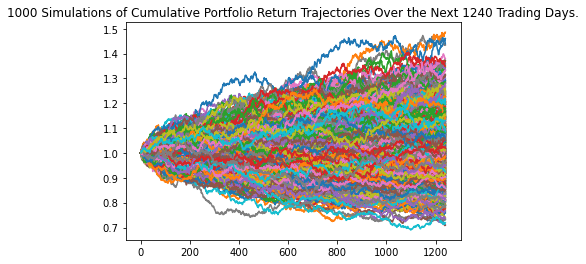

In [25]:
line_plot = MC_even_dist.plot_simulation()

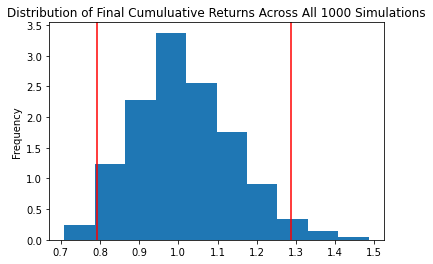

In [26]:
dist_plot = MC_even_dist.plot_distribution()

In [27]:
even_tbl = MC_even_dist.summarize_cumulative_return()

# Print summary statistics
print(even_tbl)

count           1000.000000
mean               1.016154
std                0.127869
min                0.709030
25%                0.927452
50%                1.005732
75%                1.096289
max                1.485583
95% CI Lower       0.793570
95% CI Upper       1.286634
Name: 1240, dtype: float64


In [28]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $10,000 investments
even_tbl_ci_lower = round(even_tbl[8]*10000,2)
even_tbl_ci_upper = round(even_tbl[9]*10000,2)

# Print results
print(f"There is a 95% chance that an initial investment of $10,000 in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${even_tbl_ci_lower} and ${even_tbl_ci_upper}.")

There is a 95% chance that an initial investment of $10,000 in the portfolio over the next 5 years will end within in the range of $7935.7 and $12866.34.


In [29]:
# begin plots

In [30]:
curr_fx.head()

eur                                         jpy                    \
     datetime    open    high     low   close    datetime     open     high   
1  2021-01-08  1.2271  1.2272  1.2233  1.2240  2021-01-08  103.781  103.997   
2  2021-01-07  1.2325  1.2345  1.2243  1.2269  2021-01-07  103.011  103.957   
3  2021-01-06  1.2296  1.2349  1.2264  1.2324  2021-01-06  102.706  103.444   
4  2021-01-05  1.2247  1.2306  1.2243  1.2296  2021-01-05  103.105  103.191   
5  2021-01-04  1.2239  1.2310  1.2229  1.2246  2021-01-04  103.099  103.316   

                           gbp                                  
      low    close    datetime    open    high     low   close  
1  103.74  103.968  2021-01-08  1.3569  1.3572  1.3537  1.3543  
2  102.92  103.777  2021-01-07  1.3607  1.3633  1.3531  1.3561  
3  102.56  103.014  2021-01-06  1.3626  1.3672  1.3537  1.3605  
4  102.57  102.697  2021-01-05  1.3570  1.3642  1.3552  1.3625  
5  102.68  103.103  2021-01-04  1.3656  1.3704  1.3539  1.3566

In [31]:

curr_fx2=pd.concat([eur_df, jpy_df, gbp_df], axis=1, sort=False)
curr_fx2.columns = ['datetime', 'eur_open', 'eur_high', 'eur_low', 'eur_close', 'jpy_date', 'jpy_open', 'jpy_high', 'jpy_low', 'jpy_close', 'gbp_date', 'gbp_open', 'gbp_high', 'gbp_low', 'gbp_close']
curr_fx2 = curr_fx2.drop(columns=['jpy_date', 'gbp_date'])


In [32]:
curr_fx2['datetime'] = pd.to_datetime(curr_fx2['datetime'])
curr_fx2.set_index('datetime', inplace=True)

In [33]:
curr_fx2['eur_open'] = curr_fx2['eur_open'].astype(float)
curr_fx2['eur_high'] = curr_fx2['eur_high'].astype(float)
curr_fx2['eur_low'] = curr_fx2['eur_low'].astype(float)
curr_fx2['eur_close'] = curr_fx2['eur_close'].astype(float)
curr_fx2['jpy_open'] = curr_fx2['jpy_open'].astype(float)
curr_fx2['jpy_high'] = curr_fx2['jpy_high'].astype(float)
curr_fx2['jpy_low'] = curr_fx2['jpy_low'].astype(float)
curr_fx2['jpy_close'] = curr_fx2['jpy_close'].astype(float)
curr_fx2['gbp_open'] = curr_fx2['gbp_open'].astype(float)
curr_fx2['gbp_high'] = curr_fx2['gbp_high'].astype(float)
curr_fx2['gbp_low'] = curr_fx2['gbp_low'].astype(float)
curr_fx2['gbp_close'] = curr_fx2['gbp_close'].astype(float)
curr_fx2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5000 entries, 2021-01-08 to 2001-11-09
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   eur_open   5000 non-null   float64
 1   eur_high   5000 non-null   float64
 2   eur_low    5000 non-null   float64
 3   eur_close  5000 non-null   float64
 4   jpy_open   5000 non-null   float64
 5   jpy_high   5000 non-null   float64
 6   jpy_low    5000 non-null   float64
 7   jpy_close  5000 non-null   float64
 8   gbp_open   5000 non-null   float64
 9   gbp_high   5000 non-null   float64
 10  gbp_low    5000 non-null   float64
 11  gbp_close  5000 non-null   float64
dtypes: float64(12)
memory usage: 507.8 KB


In [34]:
#curr_fx2.hvplot(x='datetime', y=['eur_close',],width=800, height=600, grid=True)

In [35]:
#curr_fx2.hvplot(x='datetime', y=['jpy_close',],width=800, height=600, grid=True)

In [36]:
#curr_fx2.hvplot(x='datetime', y=['gbp_close'],width=800, height=600, grid=True)

Column
    [0] ParamFunction(function)
    [1] Select(name='currency', options=['eur_open', 'eur_high', ...], value='eur_open')

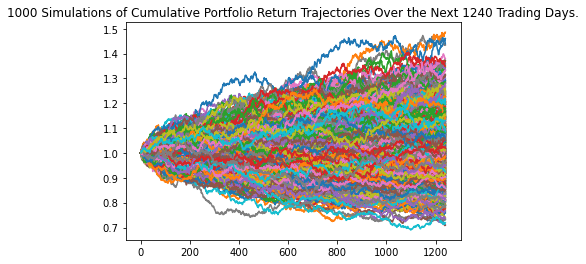

In [37]:
y = pn.widgets.Select(name='currency', options=['eur_open',
                                                'eur_high',
                                                'eur_low',
                                                'eur_close',
                                                'jpy_open',
                                                'jpy_high',
                                                'jpy_low',
                                                'jpy_close',
                                                'gbp_open',
                                                'gbp_high',
                                                'gbp_low',
                                                'gbp_close'])

plot1 = curr_fx2.hvplot(y=y, width=600, height=400, grid=True)
plot2 = MC_even_dist.plot_simulation()

pn.Column(plot1, y)
#line_plot = MC_even_dist.plot_simulation()
